## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "Mouse_metadata.csv"
study_results_path = "Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
df = pd.merge(mouse_metadata, study_results, on = "Mouse ID")
# Display the data table for preview
df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
number_of_mice = len(df['Mouse ID'].unique())
number_of_mice

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dup = df.groupby('Mouse ID').Timepoint.unique()
dup = dup.duplicated()
duplicate_id = dup.loc[dup == True]     
duplicate_id


Mouse ID
d133    True
f932    True
h428    True
l872    True
n482    True
o848    True
t573    True
u153    True
v199    True
x226    True
x336    True
Name: Timepoint, dtype: bool

In [ ]:
# Optional: Get all the data for the duplicate mouse ID. 
# dupdf = pd.merge(dup1,df, on='Mouse ID')
# dupdf
# dup_df = df.loc[df['Mouse Id'] == 'd133',:]
# dup_df

In [4]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
df.drop(df[df['Mouse ID'] == 'd133'].index, inplace = True)
df.drop(df[df['Mouse ID'] == 'f932'].index, inplace = True)
df.drop(df[df['Mouse ID'] == 'h428'].index, inplace = True)
df.drop(df[df['Mouse ID'] == 'l872'].index, inplace = True)
df.drop(df[df['Mouse ID'] == 'n482'].index, inplace = True)
df.drop(df[df['Mouse ID'] == 'o848'].index, inplace = True)
df.drop(df[df['Mouse ID'] == 't573'].index, inplace = True)
df.drop(df[df['Mouse ID'] == 'u153'].index, inplace = True)
df.drop(df[df['Mouse ID'] == 'v199'].index, inplace = True)
df.drop(df[df['Mouse ID'] == 'x226'].index, inplace = True)
df.drop(df[df['Mouse ID'] == 'x336'].index, inplace = True)

In [5]:
# Checking the number of mice in the clean DataFrame.
number_of_mice = len(df['Mouse ID'].unique())
number_of_mice

238

## Summary Statistics

In [6]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary satatistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

summary = df[['Drug Regimen','Tumor Volume (mm3)']].groupby('Drug Regimen').mean()
summary['Median'] = df[['Drug Regimen','Tumor Volume (mm3)']].groupby('Drug Regimen').median()
summary['Variance'] = df[['Drug Regimen','Tumor Volume (mm3)']].groupby('Drug Regimen').var()
summary['Std. Dev.'] = df[['Drug Regimen','Tumor Volume (mm3)']].groupby('Drug Regimen').std()
summary['SEM'] = df[['Drug Regimen','Tumor Volume (mm3)']].groupby('Drug Regimen').sem()
summary = summary.rename(columns = {'Tumor Volume (mm3)': 'Mean'})

summary



,Mean,Median,Variance,Std. Dev.,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.721306,51.905447,38.957012,6.241555,0.471817
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.345698,53.739593,68.149888,8.255295,0.605308
Naftisol,54.432995,52.544915,65.934669,8.120017,0.598616
Placebo,54.083767,52.316010,61.051374,7.813538,0.582387
Propriva,52.368318,50.909965,42.278090,6.502160,0.514041
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.284444,52.488221,59.303779,7.700895,0.573991


In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
df.groupby('Drug Regimen').agg({'Tumor Volume (mm3)': ['mean', 'median', 'var', 'std','sem']})            

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.721306  51.905447  38.957012  6.241555  0.471817
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.345698  53.739593  68.149888  8.255295  0.605308
Naftisol              54.432995  52.544915  65.934669  8.120017  0.598616
Placebo               54.083767  52.316010  61.051374  7.813538  0.582387
Propriva              52.368318  50.909965  42.278090  6.502160  0.514041
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.284444  52.488221  59.303779  7.700895  0.573991
Zoniferol             53.282012  51.826638  48.424014  6.958737  0.517239

## Bar and Pie Charts

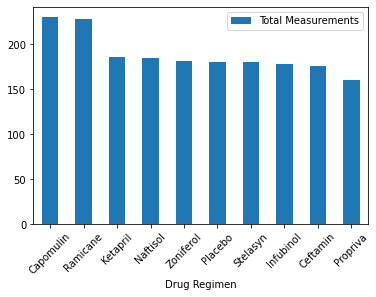

In [8]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.

counts = df['Drug Regimen'].value_counts()
counts

sub_df = pd.DataFrame({'Drug Regimen': ['Capomulin','Ramicane','Ketapril','Naftisol','Zoniferol','Placebo','Stelasyn','Infubinol','Ceftamin','Propriva'],
                  'Total Measurements': [230,228,186,184,181,180,180,178,175,160]})

sub_df.plot.bar(x = 'Drug Regimen', y = 'Total Measurements', rot = 45)

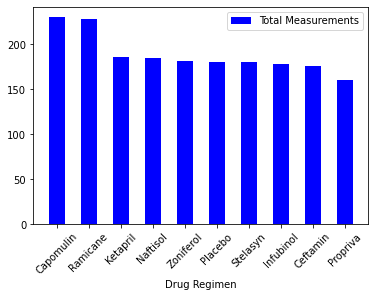

In [24]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
sub_df = pd.DataFrame({'Drug Regimen': ['Capomulin','Ramicane','Ketapril','Naftisol','Zoniferol','Placebo','Stelasyn','Infubinol','Ceftamin','Propriva'],
                  'Total Measurements': [230,228,186,184,181,180,180,178,175,160]})
plt.bar(sub_df['Drug Regimen'] ,sub_df['Total Measurements'], width = 0.5, color='b',alpha = 1, align = 'center')
plt.xticks(rotation=45)
plt.xlabel("Drug Regimen")
plt.legend(["Total Measurements"], loc = 'best')
plt.show()
# plt.bar(x_axis, rain_df["Inches"], color='r', alpha=0.5, align="edge")
# plt.xticks(tick_locations, rain_df["State"], rotation="vertical")

In [34]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
df_gend = df.groupby['Mouse ID']
df_gend['Sex']

#df.plot.pie(y = 'Sex')

TypeError: 'method' object is not subscriptable

In [ ]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot



## Quartiles, Outliers and Boxplots

In [ ]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [ ]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [ ]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [ ]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
